In [1]:
import torch, detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [2]:
import numpy as np
import os, json, cv2, random
from matplotlib import pyplot as plt

In [3]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [4]:
def cv2_imshow(im):
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB));
  plt.show();

In [5]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("sps_dataset_train", {}, 
                        "/home/ecervera/Desktop/CERN/detectron2/jupyter-demo/annotations_contours/instances_Subset01.json", 
                        "/home/ecervera/Desktop/CERN/detectron2/jupyter-demo/image_SPS_1720795090")

In [6]:
sps_metadata = MetadataCatalog.get("sps_dataset_train")
sps_dataset = DatasetCatalog.get("sps_dataset_train")

[07/24 14:39:07 d2.data.datasets.coco]: Loaded 302 images in COCO format from /home/ecervera/Desktop/CERN/detectron2/jupyter-demo/annotations_contours/instances_Subset01.json


In [7]:
from detectron2.engine import DefaultTrainer
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("sps_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2  # This is the real "batch size" commonl
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300	# 300 iterations seems good enough 
cfg.SOLVER.STEPS = []    	# do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[07/24 14:39:07 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (2, 256, 1, 1) in

[07/24 14:39:07 d2.engine.train_loop]: Starting training from iteration 0


/home/ecervera/.local/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[07/24 14:39:12 d2.utils.events]:  eta: 0:00:57  iter: 19  total_loss: 2.103  loss_cls: 0.9177  loss_box_reg: 0.4196  loss_mask: 0.6903  loss_rpn_cls: 0.05898  loss_rpn_loc: 0.0115    time: 0.1994  last_time: 0.2169  data_time: 0.0061  last_data_time: 0.0022   lr: 1.6068e-05  max_mem: 2245M
[07/24 14:39:16 d2.utils.events]:  eta: 0:00:51  iter: 39  total_loss: 1.992  loss_cls: 0.7601  loss_box_reg: 0.5033  loss_mask: 0.6843  loss_rpn_cls: 0.05122  loss_rpn_loc: 0.007671    time: 0.1945  last_time: 0.2046  data_time: 0.0024  last_data_time: 0.0027   lr: 3.2718e-05  max_mem: 2246M
[07/24 14:39:20 d2.utils.events]:  eta: 0:00:46  iter: 59  total_loss: 1.902  loss_cls: 0.5827  loss_box_reg: 0.599  loss_mask: 0.6655  loss_rpn_cls: 0.02467  loss_rpn_loc: 0.009724    time: 0.1945  last_time: 0.2066  data_time: 0.0024  last_data_time: 0.0024   lr: 4.9367e-05  max_mem: 2246M
[07/24 14:39:24 d2.utils.events]:  eta: 0:00:42  iter: 79  total_loss: 1.841  loss_cls: 0.5031  loss_box_reg: 0.6041  los

In [8]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[07/24 14:40:09 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [9]:
from detectron2.utils.visualizer import ColorMode

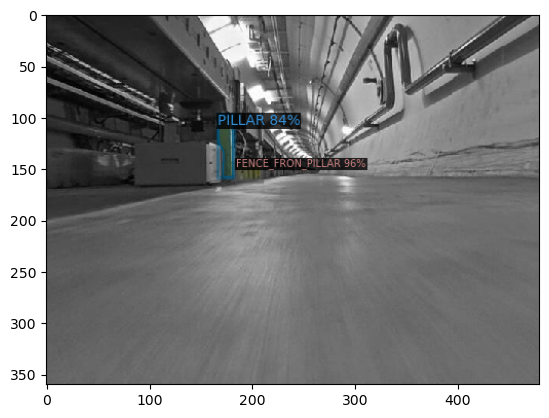

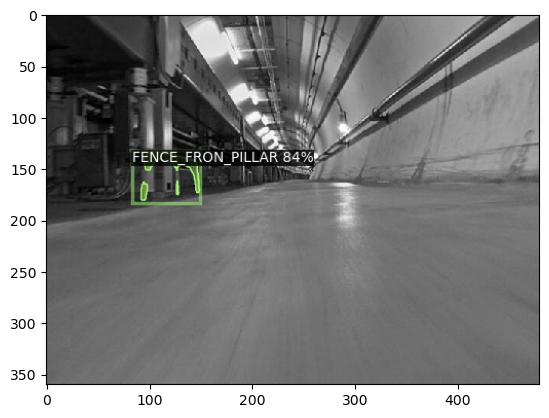

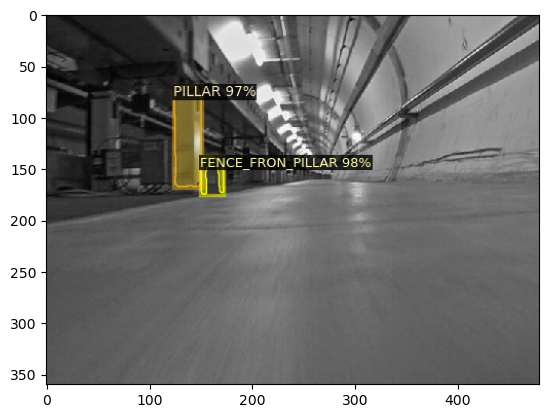

In [10]:
for d in random.sample(sps_dataset[51:], 3):
      im = cv2.imread(d["file_name"])
      outputs = predictor(im)
      v = Visualizer(im[:, :, ::-1],
               	metadata=sps_metadata,
               	scale=0.75,
               	instance_mode=ColorMode.IMAGE_BW
      )
      out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
      cv2_imshow(out.get_image()[:, :, ::-1])

In [11]:
cv2.__version__

'4.5.4'

In [13]:
cv2.startWindowThread()
cv2.namedWindow("SPS video")

In [33]:
input_video = cv2.VideoCapture('SPSVideo5.mp4')

In [34]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('SPSVideo5_out.avi', fourcc, 25.0, (1280,  720))

In [35]:
try:
    while input_video.isOpened():
        ret, im = input_video.read()
        if not ret:
            break
        outputs = predictor(im)
        v = Visualizer(im[:, :, ::-1],
                 	metadata=sps_metadata,
                 	instance_mode=ColorMode.IMAGE_BW
        )
        out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        frame = out.get_image()[:, :, ::-1]
        output_video.write(frame)
        cv2.imshow('SPS video', frame)
        cv2.waitKey(1)
except KeyboardInterrupt:
    pass
input_video.release()
output_video.release()